# Data Mining Exercise:

----
# 1. Look at the big picture  
### Issue:  
Accidentes automovilísticos en Barcelona.  
Detectar las zonas más peligrosas y reducir las víctimas.

- ¿Supervisada, no supervisada o Aprendizaje Reforzado?  
**Supervisada.**
- ¿Clasificación, Regresión u otra cosa?  
**Regresión.**
- ¿Aprendizaje en Batch o con técnicas de aprendizaje online?  
**...**

---  
# 2. Get the data. (libreries and metrics)


In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('dataset.csv')

---
# 3. Discover and visualize the data to gain insights.

In [2]:
df = df.sort_values(by = 'date')

In [3]:
df.reset_index(drop = True, inplace = True)

In [4]:
df['Weekday'] = df['date']
df['Month'] = df['date']
df['Year'] = df['date']

In [5]:
df['Weekday'] = pd.to_datetime(df.Weekday)
df['Weekday'] = df['Weekday'].dt.weekday_name
df['Weekday'] = df['Weekday'].replace({"Monday":0,"Tuesday":1,"Wednesday":2,"Thursday":3,"Friday":4,"Saturday":5,"Sunday":6})
df['Month'] = pd.to_datetime(df.Month)
df['Month'] = df['Month'].dt.month
df['Year'] = pd.to_datetime(df.Year)
df['Year'] = df['Year'].dt.year
#3 Drop de variable original
df = df.drop("date",1)
df.head()

,GridID,Shift,Accident,Longitude.grid,Latitude.grid,Weekday,Month,Year
0,1078,Afternoon,0,2.1800,41.4575,4,1,2010
1,406,Morning,0,2.1375,41.3475,4,1,2010
2,932,Morning,0,2.1700,41.4575,4,1,2010
3,454,Morning,0,2.1400,41.3675,4,1,2010
4,1007,Afternoon,0,2.1750,41.4625,4,1,2010


---
## Visualizaciones  

In [6]:
df["Accident"].value_counts()

0    788070
1     36517
Name: Accident, dtype: int64

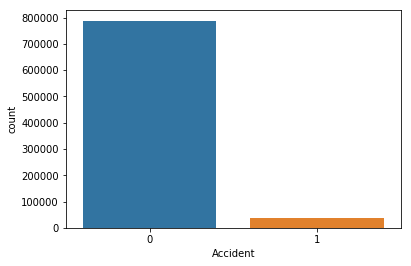

In [7]:
sns.countplot(x="Accident",data=df);

In [8]:
df["Weekday"].value_counts()

4    119237
2    118546
1    118378
0    117888
3    117876
5    116865
6    115797
Name: Weekday, dtype: int64

In [9]:
import seaborn as sns
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

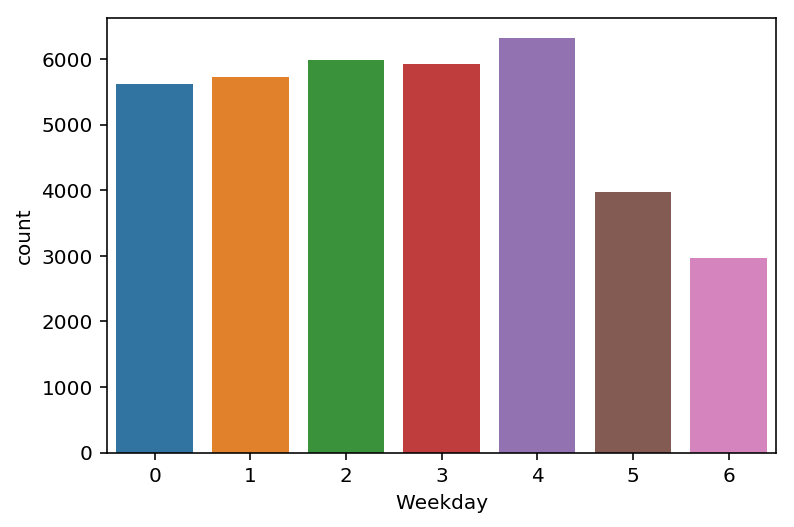

In [10]:
happen = df[df['Accident'] == 1]
sns.countplot(x="Weekday", data=happen);

* 0 - Lunes
* 1 - Martes
* 2 - Miercoles
* 3 - Jueves
* 4 - Viernes
* 5 - Sabado
* 6 - Domingo

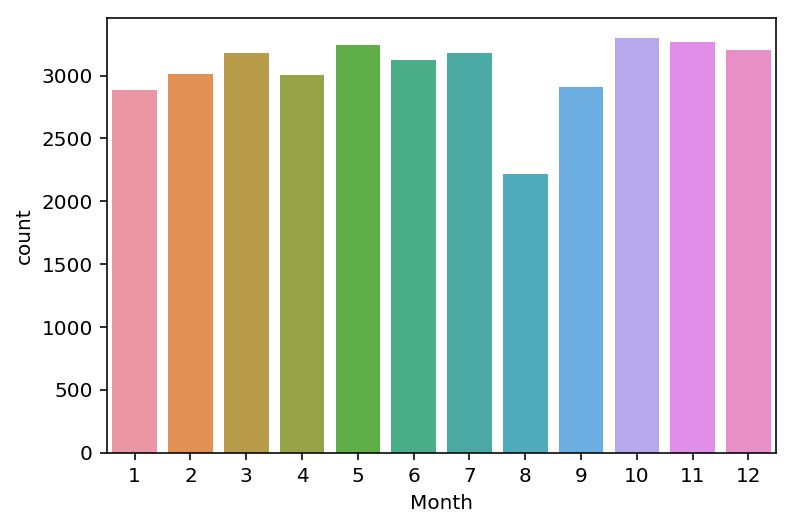

In [11]:
happenM = df[df['Accident'] == 1]
sns.countplot(x="Month", data=happen);

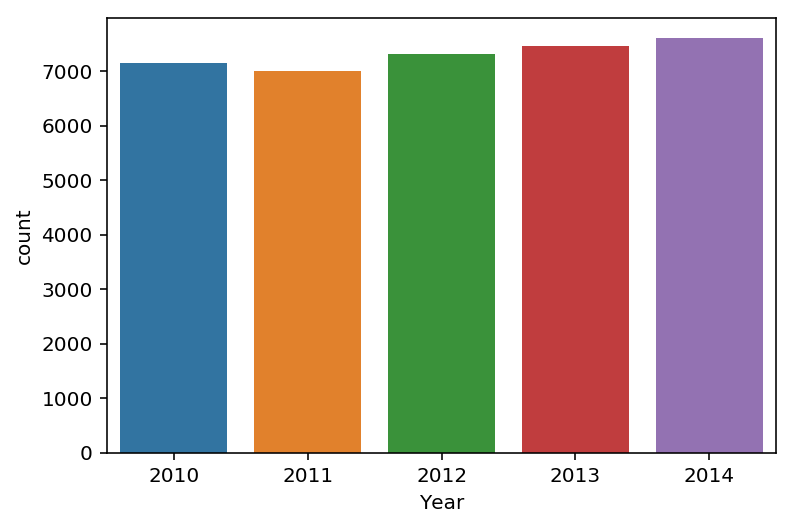

In [12]:
happenM = df[df['Accident'] == 1]
sns.countplot(x="Year", data=happen);

In [13]:
happen = df[df['Accident'] == 1]

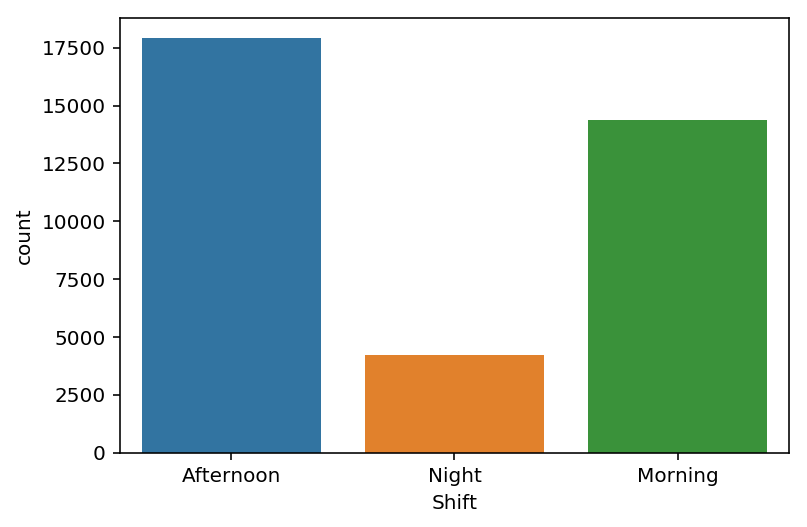

In [14]:
sns.countplot(x="Shift", data=happen);

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

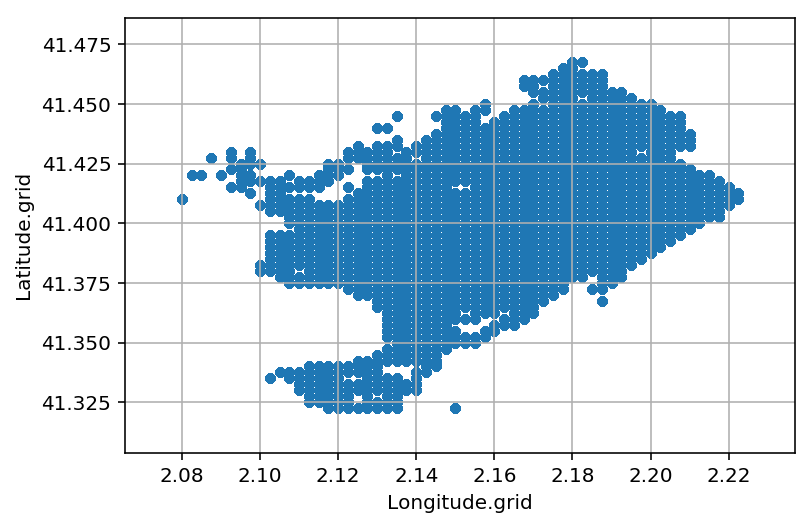

In [16]:
df.plot(kind = "Scatter", x ="Longitude.grid", y = "Latitude.grid", alpha = 0.001999999)
plt.grid(True)

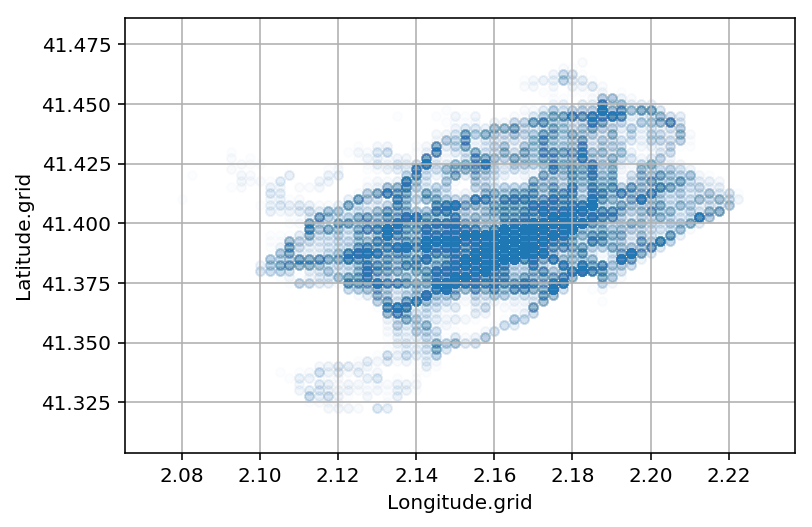

In [17]:
happen.plot(kind = "Scatter", x ="Longitude.grid", y = "Latitude.grid", alpha = 0.01)
plt.grid(True)

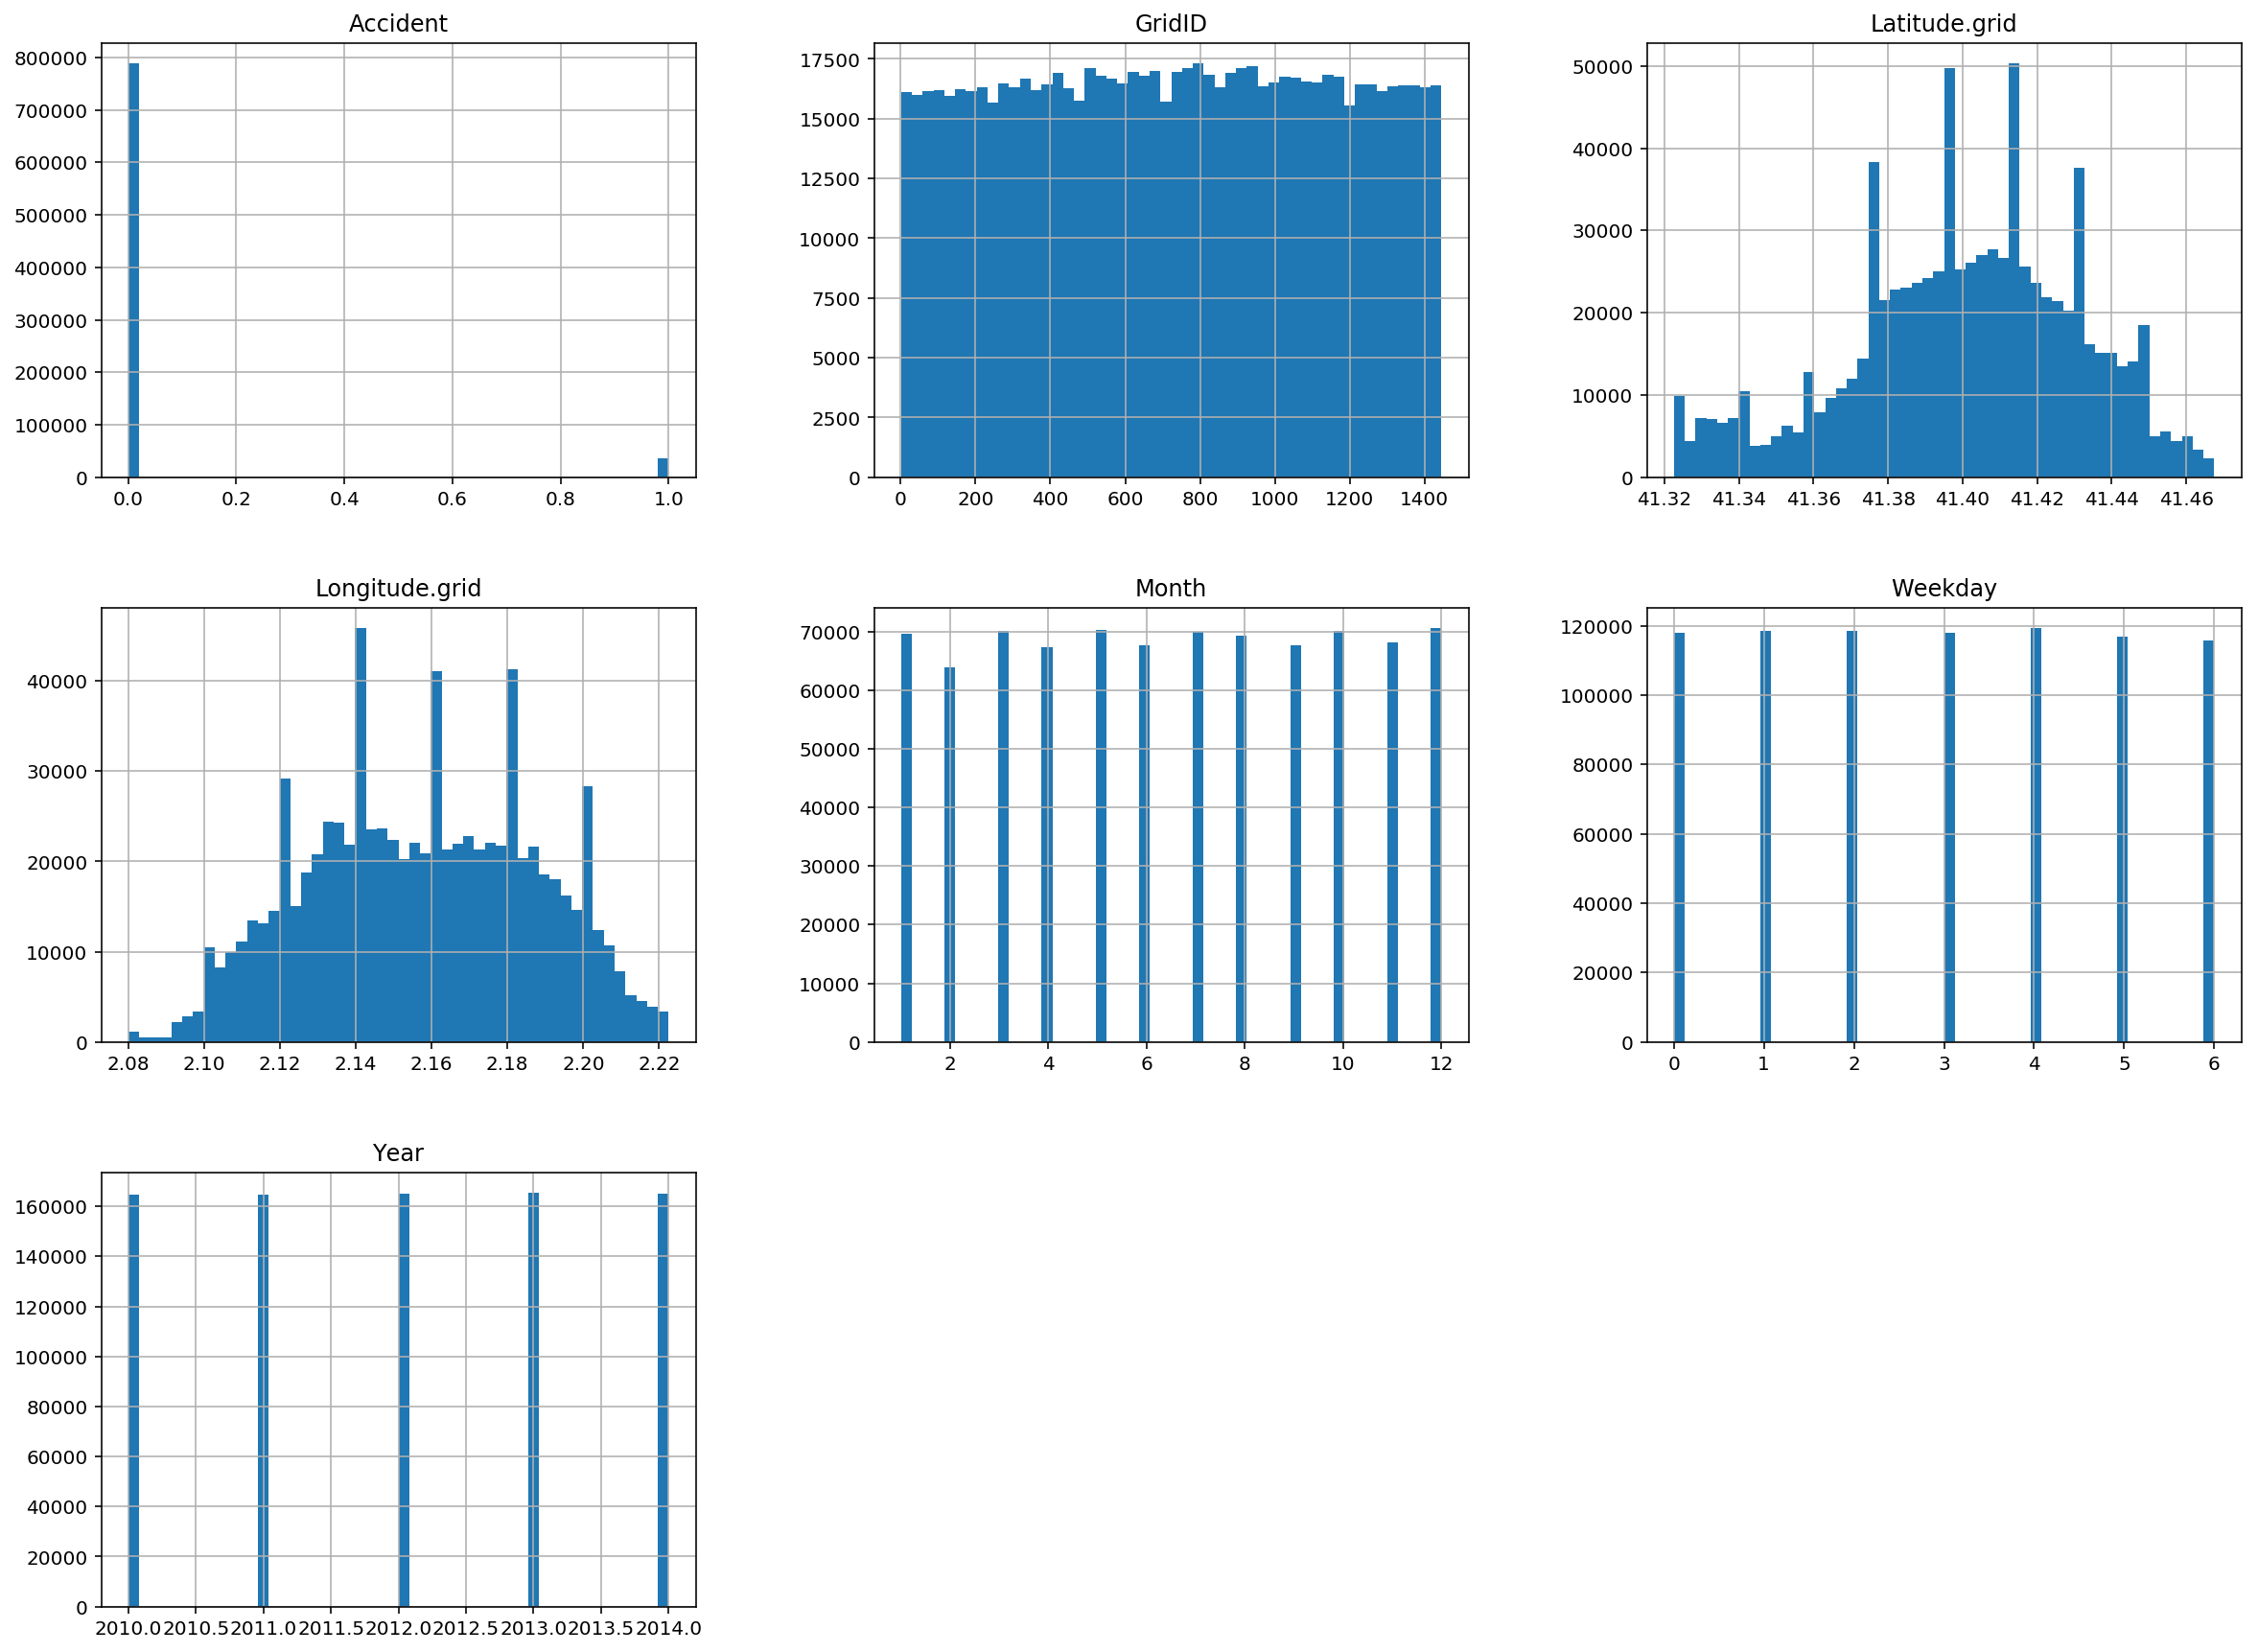

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

---

## Preprocesado (1)

In [19]:
df['Weekday'] = df['Weekday'].replace({0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"})
df['Month'] = df['Month'].replace({1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"})
df.head()

,GridID,Shift,Accident,Longitude.grid,Latitude.grid,Weekday,Month,Year
0,1078,Afternoon,0,2.1800,41.4575,Friday,January,2010
1,406,Morning,0,2.1375,41.3475,Friday,January,2010
2,932,Morning,0,2.1700,41.4575,Friday,January,2010
3,454,Morning,0,2.1400,41.3675,Friday,January,2010
4,1007,Afternoon,0,2.1750,41.4625,Friday,January,2010


In [20]:
#1 Dummies
dWeekday = pd.get_dummies(df["Weekday"])
dWeekday.shape
#1 Dummies
dMonth = pd.get_dummies(df["Month"])
dMonth.shape
#1 Dummies
dYear = pd.get_dummies(df["Year"])
dYear.shape
#1 Dummies
dShift = pd.get_dummies(df["Shift"])
dShift.shape

#2 Concat
df = pd.concat([df, dWeekday], axis = 1)
#2 Concat
df = pd.concat([df, dMonth], axis = 1)
#2 Concat
df = pd.concat([df, dYear], axis = 1)
#2 Concat
df = pd.concat([df,dShift], axis = 1)

#3 Drop de variable original
df = df.drop("Weekday", 1)
#3 Drop de variable original
df = df.drop("Month", 1)
#3 Drop de variable original
df = df.drop("Year", 1)
#3 Drop de variable original
df = df.drop("Shift",1)
df.head()

,GridID,Accident,Longitude.grid,Latitude.grid,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,...,October,September,2010,2011,2012,2013,2014,Afternoon,Morning,Night
0,1078,0,2.1800,41.4575,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,406,0,2.1375,41.3475,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,932,0,2.1700,41.4575,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,454,0,2.1400,41.3675,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,1007,0,2.1750,41.4625,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


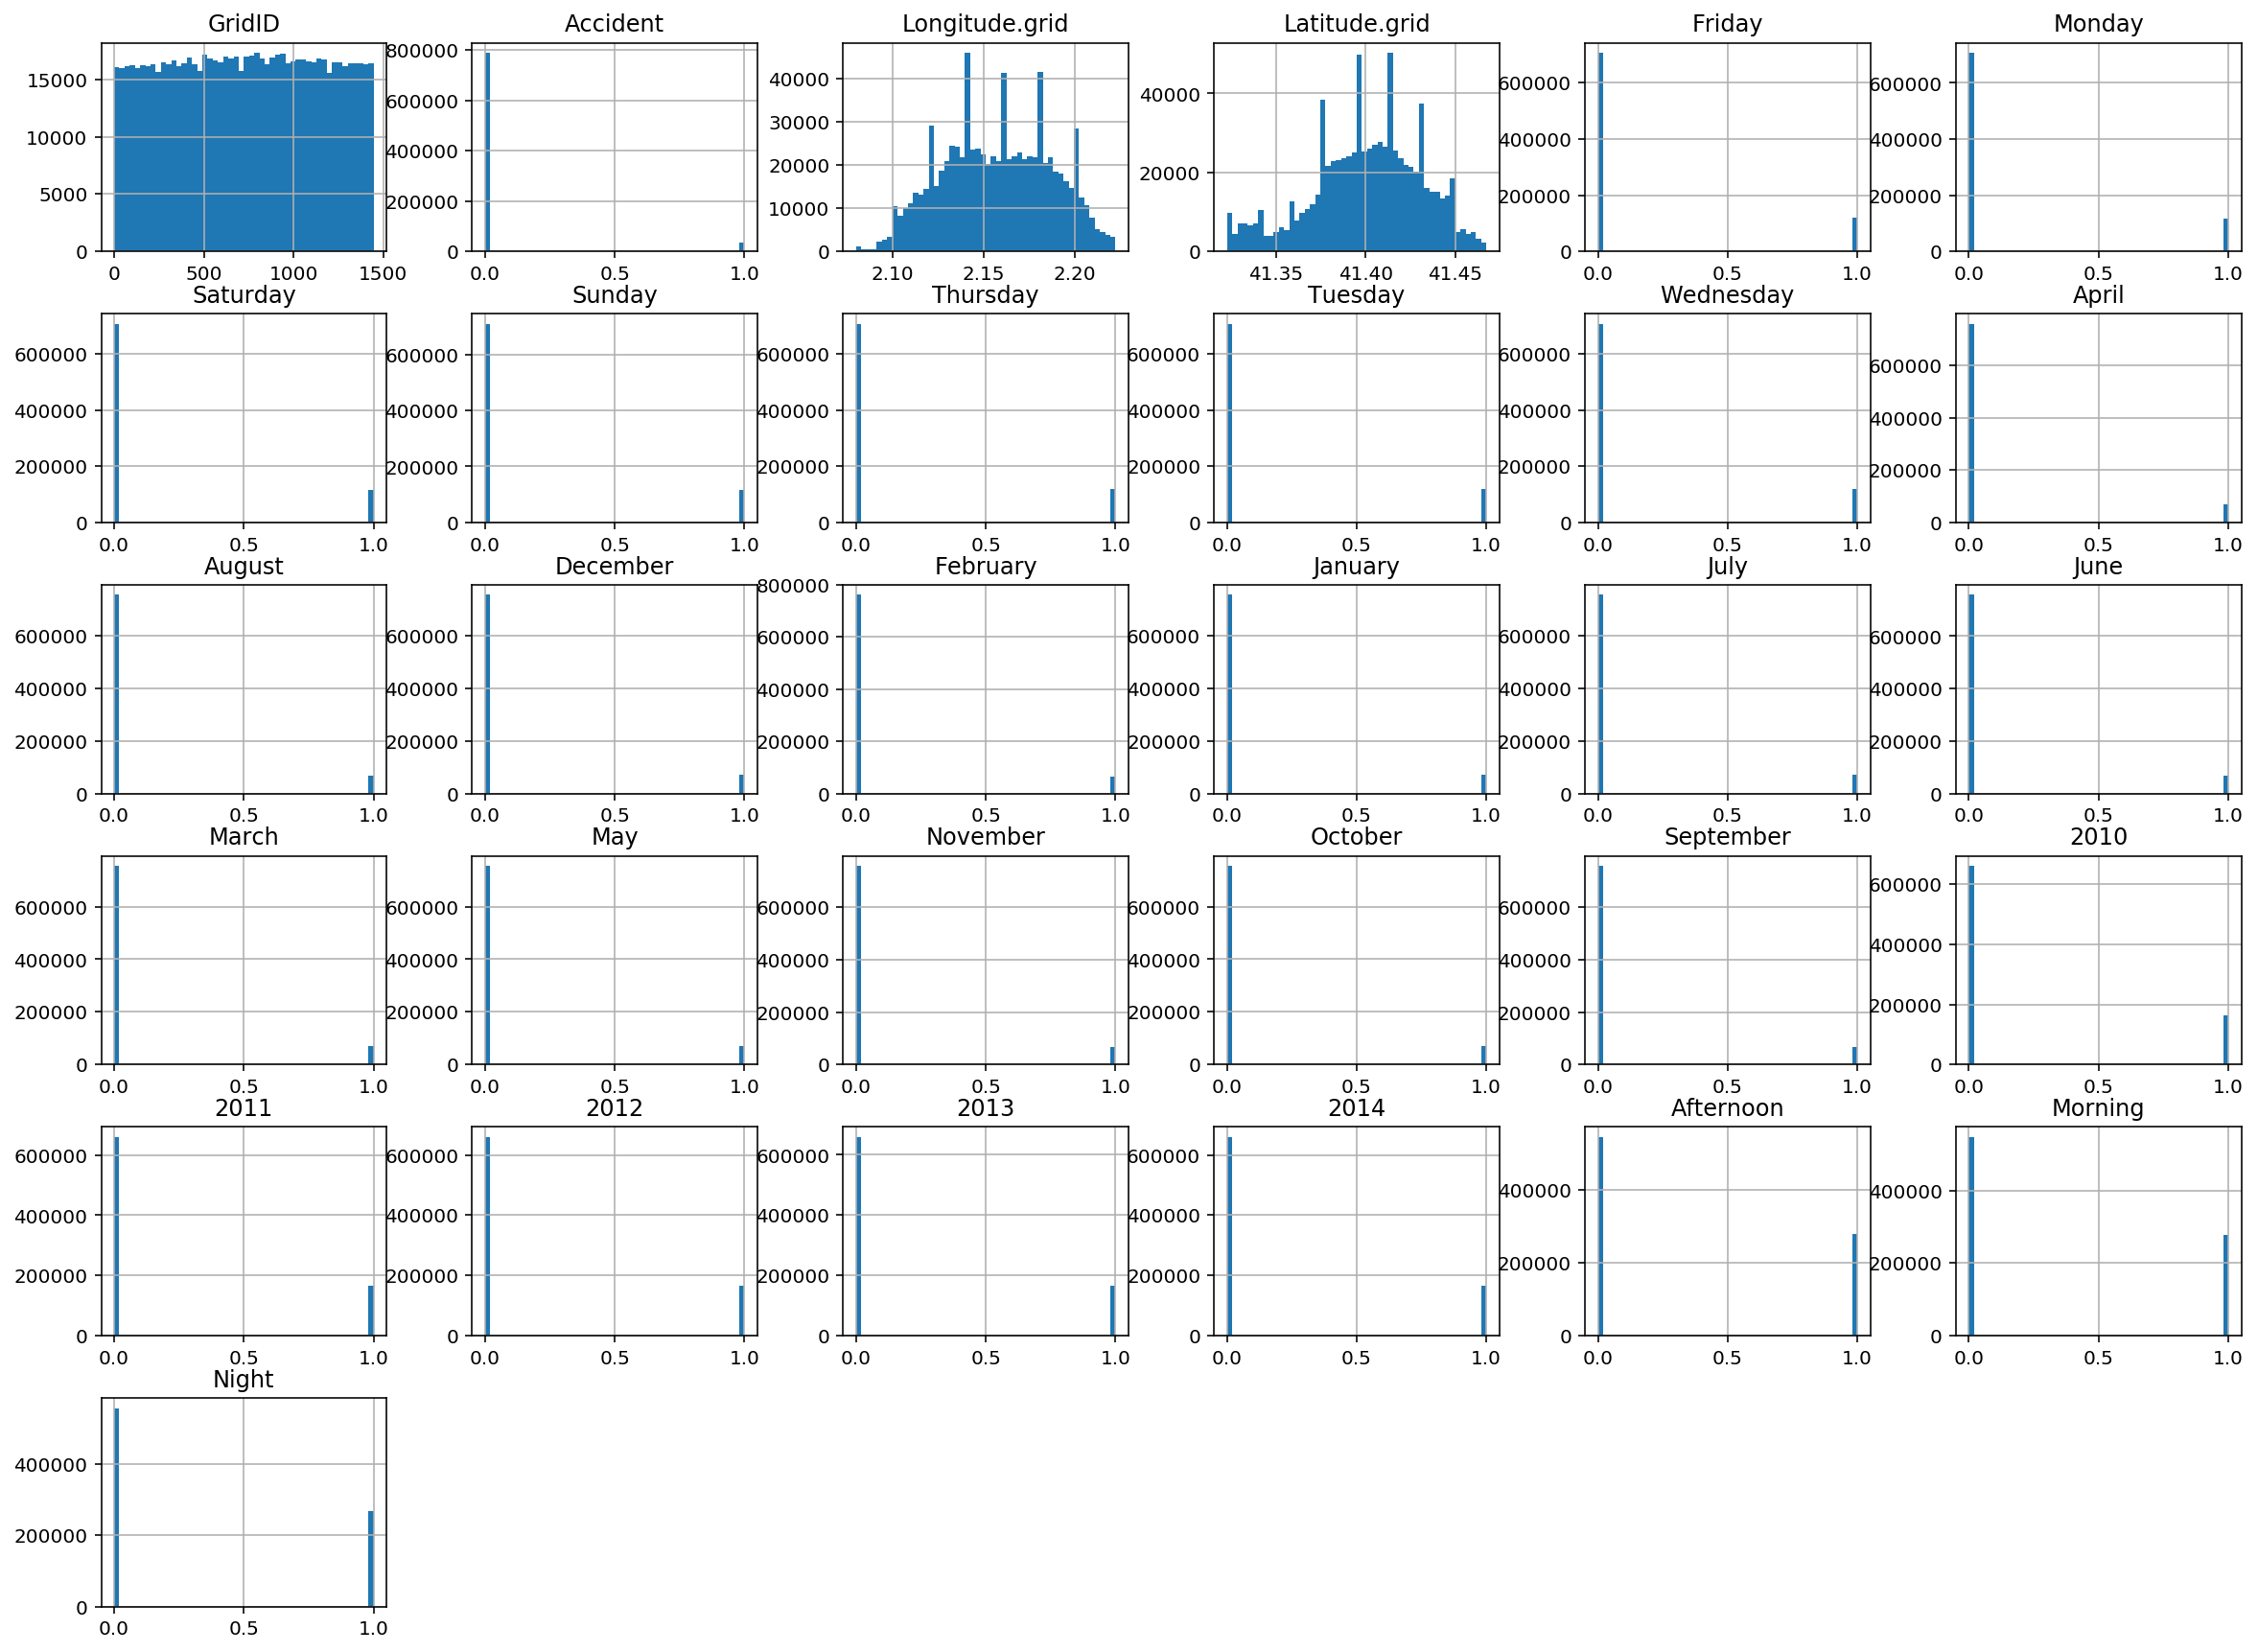

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
df.boxplot
df.hist(bins=50, figsize=(20,15))
plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824587 entries, 0 to 824586
Data columns (total 31 columns):
GridID            824587 non-null int64
Accident          824587 non-null int64
Longitude.grid    824587 non-null float64
Latitude.grid     824587 non-null float64
Friday            824587 non-null uint8
Monday            824587 non-null uint8
Saturday          824587 non-null uint8
Sunday            824587 non-null uint8
Thursday          824587 non-null uint8
Tuesday           824587 non-null uint8
Wednesday         824587 non-null uint8
April             824587 non-null uint8
August            824587 non-null uint8
December          824587 non-null uint8
February          824587 non-null uint8
January           824587 non-null uint8
July              824587 non-null uint8
June              824587 non-null uint8
March             824587 non-null uint8
May               824587 non-null uint8
November          824587 non-null uint8
October           824587 non-null uint8
Septe

In [23]:
df.dtypes

GridID              int64
Accident            int64
Longitude.grid    float64
Latitude.grid     float64
Friday              uint8
Monday              uint8
Saturday            uint8
Sunday              uint8
Thursday            uint8
Tuesday             uint8
Wednesday           uint8
April               uint8
August              uint8
December            uint8
February            uint8
January             uint8
July                uint8
June                uint8
March               uint8
May                 uint8
November            uint8
October             uint8
September           uint8
2010                uint8
2011                uint8
2012                uint8
2013                uint8
2014                uint8
Afternoon           uint8
Morning             uint8
Night               uint8
dtype: object

Realiza un ***df.describe()*** en este caso no es bastante revelador, por lo tanto se omitirá.

### Regresion Logistica (sin balancear -SOLO PRUEBA-)

In [24]:
X = np.array(df.drop(['Accident'],1))
y = np.array(df['Accident'])
X.shape

(824587, 30)

In [25]:
model = linear_model.LogisticRegression()
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
predictions = model.predict(X)
print(predictions[0:5])

[0 0 0 0 0]


In [27]:
model.score(X,y)

0.9557148002575835

In [28]:
validation_size = 0.20
seed = 7
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=validation_size, random_state=seed)

array([[ 82.    ,   2.11  ,  41.39  , ...,   0.    ,   0.    ,   1.    ],
       [690.    ,   2.155 ,  41.39  , ...,   1.    ,   0.    ,   0.    ],
       [270.    ,   2.1275,  41.4075, ...,   1.    ,   0.    ,   0.    ],
       ...,
       [156.    ,   2.1175,  41.3925, ...,   1.    ,   0.    ,   0.    ],
       [156.    ,   2.1175,  41.3925, ...,   1.    ,   0.    ,   0.    ],
       [ 29.    ,   2.1025,  41.385 , ...,   1.    ,   0.    ,   0.    ]])

In [29]:
name = 'Logistic Regression'
kfold = model_selection.KFold(n_splits=10,random_state=seed)
cv_results = model_selection.cross_val_score(model,X_train,y_train,cv=kfold,scoring='accuracy')
msg="%s: %f (%f)" %(name,cv_results.mean(),cv_results.std())
print(msg)

Logistic Regression: 0.955838 (0.000751)


In [30]:
predictions = model.predict(X_test)
print(accuracy_score(y_test,predictions))

0.9552201700238907


In [31]:
print(confusion_matrix(y_test,predictions))

[[157533      0]
 [  7385      0]]


In [32]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98    157533
          1       0.00      0.00      0.00      7385

avg / total       0.91      0.96      0.93    164918



C:\Users\alter\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [33]:
y_test_pred_proba = model.predict_proba(X_test)

In [34]:
from sklearn.preprocessing import binarize
from sklearn import metrics
y_pred_class = binarize(y_test_pred_proba,0.25)

In [35]:
print(metrics.confusion_matrix(y_test,y_pred_class[:,1]))

[[157533      0]
 [  7385      0]]


In [36]:
import matplotlib.pyplot as plt
import numpy as np

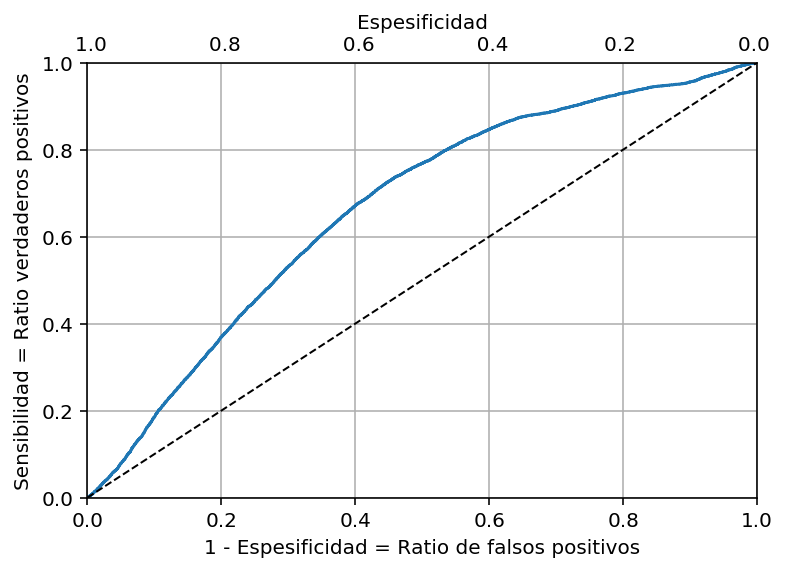

In [37]:
from IPython.display import set_matplotlib_formats 
set_matplotlib_formats('retina') 
%matplotlib inline 
rfp, rvp, umbrales = metrics.roc_curve(y_test, y_test_pred_proba[:,1]) 
plt.plot(rfp, rvp) 
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0]) 
plt.title('Espesificidad\n1.0                0.8                0.6                0.4               0.2                0.0', fontsize=10) 
plt.xlabel('1 - Espesificidad = Ratio de falsos positivos') 
plt.ylabel('Sensibilidad = Ratio verdaderos positivos') 
plt.grid(True)

In [38]:
print(metrics.roc_auc_score(y_test, y_test_pred_proba[:,1]), "AUC Score")

0.665616229806635 AUC Score


---  

# 4. Prepare the data for Machine Learning algorithms.  

## Create a Test Set

## 1. Up-sample Minority Class  
Es el proceso de duplicacion aleatoria de observaciones desde la clase minoritaria con el objetivo de reforzar la señal.

In [39]:
from sklearn.utils import resample

In [40]:
df_majority = df[df.Accident == 0]
df_minority = df[df.Accident == 1]

df_minority_unsampled = resample(df_minority,
                                replace = True,
                                n_samples= 788070,
                                random_state = 123)

df_upsampled = pd.concat([df_majority,df_minority_unsampled])

df_upsampled.Accident.value_counts()

1    788070
0    788070
Name: Accident, dtype: int64

In [41]:
from sklearn.linear_model import LogisticRegression
X = df_upsampled.drop('Accident', axis=1)
y = df_upsampled.Accident

#train
clf_1 = LogisticRegression().fit(X,y)

#predict on training set
pred_y_1 =clf_1.predict(X)

In [42]:
print(np.unique(pred_y_1))

[0 1]


In [43]:
print(confusion_matrix(y,pred_y_1))

[[384714 403356]
 [165143 622927]]


In [44]:
print(accuracy_score(y,pred_y_1))

0.6393093253137412


In [45]:
validation_size = 0.20
seed = 1234
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=validation_size, random_state=seed)

In [46]:
name = 'Logistic Regression'
kfold = model_selection.KFold(n_splits=10,random_state=seed)
cv_results = model_selection.cross_val_score(model,X_train,y_train,cv=kfold,scoring='accuracy')
msg="%s: %f (%f)" %(name,cv_results.mean(),cv_results.std())
print(msg)

Logistic Regression: 0.639084 (0.001408)


In [47]:
predictions = model.predict(X_test)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print(accuracy_score(y_test,predictions))

0.5000793076757141


In [48]:
print(confusion_matrix(y_test,predictions))

[[157639      0]
 [157589      0]]


In [49]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.50      1.00      0.67    157639
          1       0.00      0.00      0.00    157589

avg / total       0.25      0.50      0.33    315228



C:\Users\alter\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [50]:
y_test_pred_proba = model.predict_proba(X_test)

In [51]:
print(metrics.confusion_matrix(y_test,predictions))

[[157639      0]
 [157589      0]]


In [52]:
from sklearn.preprocessing import binarize
from sklearn import metrics
y_pred_class = binarize(y_test_pred_proba,0.25)

In [53]:
import matplotlib.pyplot as plt
import numpy as np

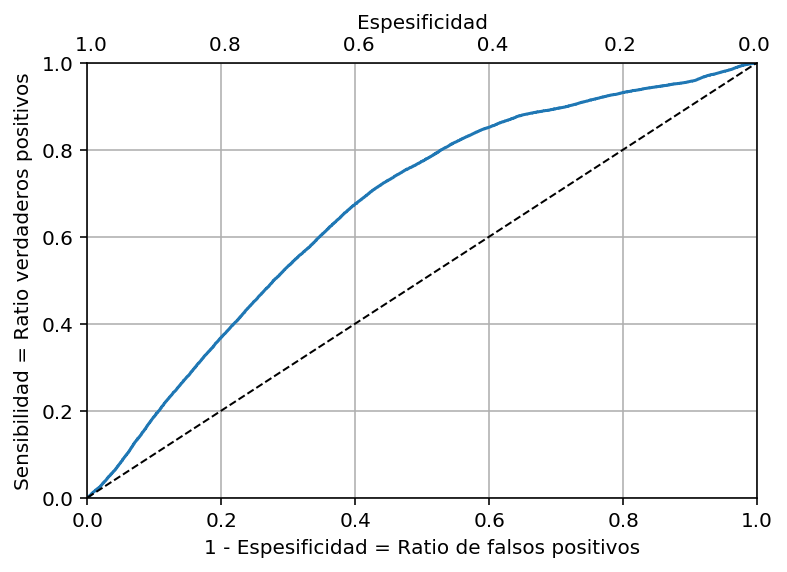

In [54]:
from IPython.display import set_matplotlib_formats 
set_matplotlib_formats('retina') 
%matplotlib inline 
rfp, rvp, umbrales = metrics.roc_curve(y_test, y_test_pred_proba[:,1]) 
plt.plot(rfp, rvp) 
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0]) 
plt.title('Espesificidad\n1.0                0.8                0.6                0.4               0.2                0.0', fontsize=10) 
plt.xlabel('1 - Espesificidad = Ratio de falsos positivos') 
plt.ylabel('Sensibilidad = Ratio verdaderos positivos') 
plt.grid(True)

In [55]:
print(metrics.roc_auc_score(y_test, y_test_pred), "AUC Score")

0.5 AUC Score


## 2. Down-sample Majority Class
Down-sampling devuelve observacinoes alietoriamente desde la clase mayoritaria para prevenir esta señal que interfiere con el algoritmo

In [56]:
from sklearn.utils import resample
df_majority = df[df.Accident == 0]
df_minority = df[df.Accident == 1]

df_majority_downsampled = resample(df_majority,
                                replace = False,
                                n_samples= 36517,
                                random_state = 123)

df_downsampled = pd.concat([df_majority_downsampled,df_minority])

df_downsampled.Accident.value_counts()

1    36517
0    36517
Name: Accident, dtype: int64

In [57]:
from sklearn.linear_model import LogisticRegression
X = df_downsampled.drop('Accident', axis=1)
y = df_downsampled.Accident

#train
clf_2 = LogisticRegression().fit(X,y)

#predict on training set
pred_y_2 = clf_2.predict(X)

In [58]:
print(np.unique(pred_y_2))

[0 1]


In [59]:
print(accuracy_score(y,pred_y_2))

0.63812744749021


In [60]:
validation_size = 0.20
seed = 1234
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=validation_size, random_state=seed)

In [61]:
name = 'Logistic Regression'
kfold = model_selection.KFold(n_splits=10,random_state=seed)
cv_results = model_selection.cross_val_score(model,X_train,y_train,cv=kfold,scoring='accuracy')
msg="%s: %f (%f)" %(name,cv_results.mean(),cv_results.std())
print(msg)

Logistic Regression: 0.636658 (0.007894)


In [62]:
predictions = model.predict(X_test)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print(accuracy_score(y_test,predictions))

0.4975011980557267


In [63]:
print(confusion_matrix(y_test,predictions))

[[7267    0]
 [7340    0]]


In [64]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.50      1.00      0.66      7267
          1       0.00      0.00      0.00      7340

avg / total       0.25      0.50      0.33     14607



C:\Users\alter\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [65]:
y_test_pred_proba = model.predict_proba(X_test)

In [66]:
from sklearn.preprocessing import binarize
from sklearn import metrics
y_pred_class = binarize(y_test_pred_proba,0.25)

In [67]:
print(metrics.confusion_matrix(y_test,y_pred_class[:,1]))

[[7267    0]
 [7340    0]]


In [68]:
import matplotlib.pyplot as plt
import numpy as np

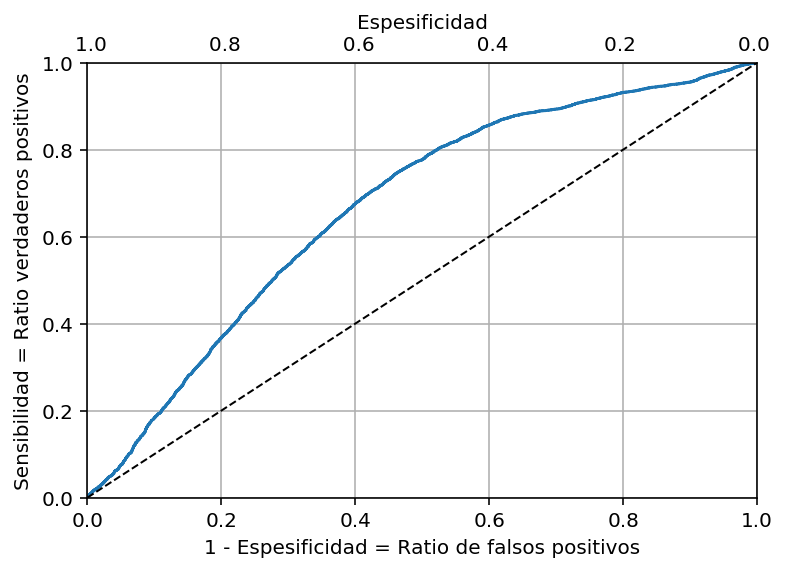

In [69]:
from IPython.display import set_matplotlib_formats 
set_matplotlib_formats('retina') 
%matplotlib inline 
rfp, rvp, umbrales = metrics.roc_curve(y_test, y_test_pred_proba[:,1]) 
plt.plot(rfp, rvp) 
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0]) 
plt.title('Espesificidad\n1.0                0.8                0.6                0.4               0.2                0.0', fontsize=10) 
plt.xlabel('1 - Espesificidad = Ratio de falsos positivos') 
plt.ylabel('Sensibilidad = Ratio verdaderos positivos') 
plt.grid(True)

In [70]:
print(metrics.roc_auc_score(y_test, y_test_pred), "AUC Score")

0.5 AUC Score


# 3. Change performance Metric  
hasta ahora hemos visto dos maneras de normalizar clases imbalanceadas resampleando el dataset. Lo siguiente, veremos el uso de otras metricas de desempeño para evaluar los modelos.

In [71]:
from sklearn.metrics import roc_auc_score
prob_y_2 = clf_2.predict_proba(X)

prob_y_2 = [p[1] for p in prob_y_2]

prob_y_2[:5]

[0.6423123998325198,
 0.5611783681383362,
 0.28565227764080836,
 0.14549045146606515,
 0.39096977428088026]

In [72]:
print(metrics.roc_auc_score(y,prob_y_2), "AUC Score")

0.66660292259322 AUC Score


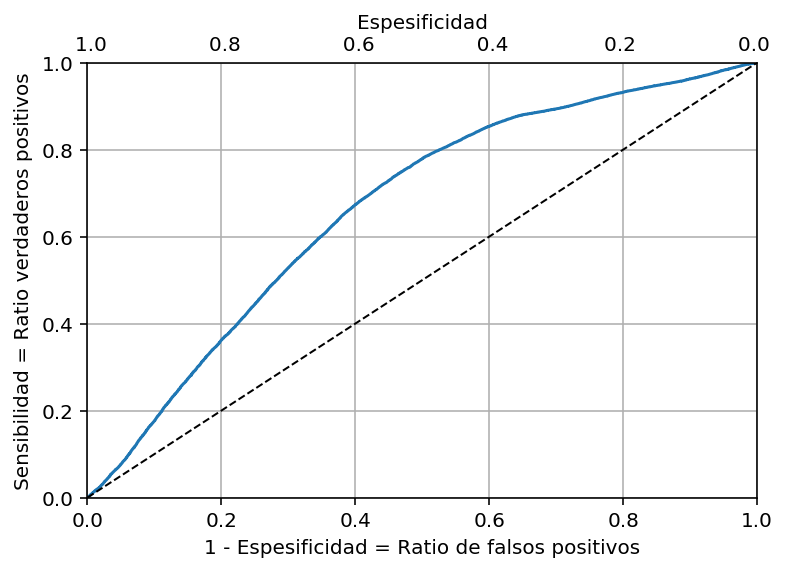

In [73]:
from sklearn import metrics
from IPython.display import set_matplotlib_formats 
set_matplotlib_formats('retina') 
%matplotlib inline 
rfp, rvp, umbrales = metrics.roc_curve(y,prob_y_2) 
plt.plot(rfp, rvp) 
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0]) 
plt.title('Espesificidad\n1.0                0.8                0.6                0.4               0.2                0.0', fontsize=10) 
plt.xlabel('1 - Espesificidad = Ratio de falsos positivos') 
plt.ylabel('Sensibilidad = Ratio verdaderos positivos') 
plt.grid(True) 

## 4. Penalize Algorithms(Cost_Sensitive Training)  
La siguiente tactica es usar algoritmos de aprendizaje penalizadores¿? que incremente el costo de los errores de clasificacion en la clase minoritaria.

In [ ]:
from sklearn.svm import SVC 
X = df_downsampled.drop('Accident', axis=1)
y = df_downsampled.Accident

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.40,random_state = 15)

clf_3 = SVC(kernel = 'linear',
            class_weight = 'balanced', 
            probability = True)

clf_3.fit(X_train,y_train)

pred_y_3 = clf_3.predict(X_test)

print(np.unique(pred_y_3))

In [ ]:
print(accuracy_score(y,pred_y_3))

In [ ]:
prob_y_3 = clf_3.predict_proba(X)
prob_y_3 = [p[1] for p in prob_y_3]
print(roc_auc_score(y,prob_y_3))

In [ ]:
from sklearn import metrics
from IPython.display import set_matplotlib_formats 
set_matplotlib_formats('retina') 
%matplotlib inline 
rfp, rvp, umbrales = metrics.roc_curve(y,prob_y_3) 
plt.plot(rfp, rvp) 
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0]) 
plt.title('Espesificidad\n1.0                0.8                0.6                0.4               0.2                0.0', fontsize=10) 
plt.xlabel('1 - Espesificidad = Ratio de falsos positivos') 
plt.ylabel('Sensibilidad = Ratio verdaderos positivos') 
plt.grid(True) 

---- 
# 5. Select a model and train it.

## 5. Use Tree-Based Algorithms  
La táctica  finala bine considerada es usar algoritmos de arboles de decision. Los arboles de decision a menudo se desempeñan bine sobre datasets no balaceados porque su estructura jerarquica permite aprender señales desde ambas clases.  
En el aprendizaje automatico  moderno aplicado, los conjuntos de arboles (Random Forests, Gradient Boosted Trees, etc.) casi siempre superan a los arboles de decision singulares.

In [74]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\alter\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [75]:
X = df_downsampled.drop('Accident', axis=1)
y = df_downsampled.Accident

clf_4 = RandomForestClassifier()
clf_4.fit(X,y)

pred_y_4 = clf_4.predict(X)

print(np.unique(pred_y_4))

[0 1]


In [76]:
print(accuracy_score(y,pred_y_4))

0.9730810307528001


In [77]:
prob_y_4 = clf_4.predict_proba(X)
prob_y_4 = [p[1] for p in prob_y_4]
print(roc_auc_score(y,prob_y_4))

0.9970374482138818


---

# DTC - Decision Tree Classifier


In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, test_size=0.30,random_state=1)

In [79]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion = 'entropy', random_state = 1)

In [80]:
DTC.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [81]:
y_train_pred = DTC.predict_proba(X_train)

In [82]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train, y_train_pred[:,1]), "Arbol de desicion - Datos de entrenamiento ")

0.9999287822281997 Arbol de desicion - Datos de entrenamiento 


In [92]:
y_test_pred = DTC.predict_proba(X_test)
print(roc_auc_score(y_test,y_test_pred[:,1]),"Arbol de desicion - Datos de test ")

0.6408079311145248 Arbol de desicion - Datos de test 


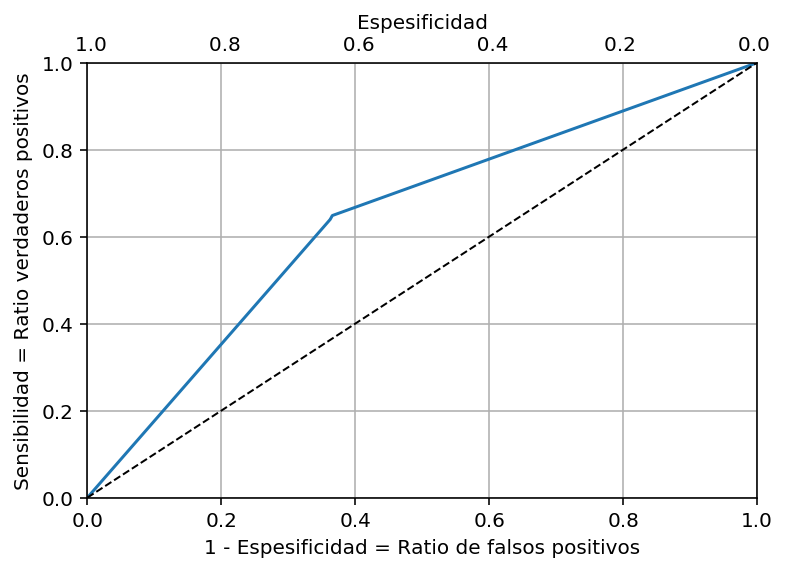

In [106]:
from sklearn import metrics
from IPython.display import set_matplotlib_formats 
set_matplotlib_formats('retina') 
%matplotlib inline 
rfp, rvp, umbrales = metrics.roc_curve(y_test,y_test_pred[:,1]) 
plt.plot(rfp, rvp) 
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0]) 
plt.title('Espesificidad\n1.0                0.8                0.6                0.4               0.2                0.0', fontsize=10) 
plt.xlabel('1 - Espesificidad = Ratio de falsos positivos') 
plt.ylabel('Sensibilidad = Ratio verdaderos positivos') 
plt.grid(True) 